# Task1 + Task2 + Task3 +Task4

Goal of this competition: 

- predict the category of each news. 


Evaluation: 

- Avg value of f1_score. 

- A comparation between submitting category result and real category data 


https://tianchi.aliyun.com/notebook-ai/detail?spm=5176.12281897.0.0.7a212b4amWToWd&postId=95703

Task1 赛题理解

https://tianchi.aliyun.com/notebook-ai/detail?spm=5176.12586969.1002.9.6406111aIKCSLV&postId=118253

Task2 数据读取与数据分析

https://tianchi.aliyun.com/notebook-ai/detail?spm=5176.12281897.0.0.7a212b4amWToWd&postId=118254

https://github.com/datawhalechina/team-learning-nlp/blob/master/NewsTextClassification/Task3%20%E5%9F%BA%E4%BA%8E%E6%9C%BA%E5%99%A8%E5%AD%A6%E4%B9%A0%E7%9A%84%E6%96%87%E6%9C%AC%E5%88%86%E7%B1%BB.md

Task3 基于机器学习的文本分类

https://tianchi.aliyun.com/notebook-ai/detail?spm=5176.12281897.0.0.7a212b4amWToWd&postId=118255

Task4 基于深度学习的文本分类1-fastText

https://tianchi.aliyun.com/notebook-ai/?spm=5176.12282024.0.0.432d14ca2Inpak

https://github.com/datawhalechina/team-learning-nlp/tree/master/NewsTextClassification
    
All Task1-6

https://shimo.im/docs/rp3OVnXzDWtpoxAm/read
    
石墨文档大纲

**听课笔记**
- Part1 比赛介绍
- Part2 baseline
- Part3 比赛知识点

一个进行文本分类的数据集。

为什么匿名数据集？
- 没有版权问题；
- 需要从头构建词向量。（不能分词）

思路：（四种方法，由易到难）
- TF-IDF + RidgeClassifier ; (F1_score ~ 0.93)
- FastText ; (F1_score ~ 0.93-0.94)
- Word2Vec + TextCNN ; (F1_score ~ 0.95-0.97)
- Bert.(F1_score ~ 0.98)

思路1 
1 ：将字符进行 TF-IDF (term frequency–inverse document frequency）统计，然后送入线性分类器进行训练；
- CountVectorizer RidgeClassifier
- TfidfVectorizer RidgeClassifier

(tf-idf是一种统计方法，用以评估一字词对于一个文件集或一个语料库中的其中一份文件的重要程度。字词的重要性随着它在文件中出现的次数成正比增加，但同时会随着它在语料库中出现的频率成反比下降。tf-idf加权的各种形式常被搜索引擎应用，作为文件与用户查询之间相关程度的度量或评级。除了tf-idf以外，互联网上的搜索引擎还会使用基于链接分析的评级方法，以确定文件在搜索结果中出现的顺序。)

Baseline
- 如何继续深入，提高精度？
- 尝试其他机器学习模型；
- 对 TF IDF 和 ngram 进行 gridsearch
- 尝试思路 2 、思路 3 、思路 4

其它尝试和思考：
你能分析得出匿名字符中的标点符号吗？ （可以出现结尾，但不开头）
你知道 NLP 中哪些数据扩增方法呢？（同义词替换，添加某个单词，等等）
线上 F1 打分能到 0.99 吗？

## Understanding and exploratory

In [14]:
import pandas as pd
import numpy as np
import os
import sys

In [15]:
df_testa=pd.read_csv('C:/Chen/1_Coding/20200721_nlp_learning/test_a.csv',sep='\t')

In [16]:
df_train=pd.read_csv('C:/Chen/1_Coding/20200721_nlp_learning/train_set.csv',sep='\t')

In [17]:
df_testa.head().append(df_testa.tail())

,text
0,5399 3117 1070 4321 4568 2621 5466 3772 4516 2...
1,2491 4109 1757 7539 648 3695 3038 4490 23 7019...
2,2673 5076 6835 2835 5948 5677 3247 4124 2465 5...
3,4562 4893 2210 4761 3659 1324 2595 5949 4583 2...
4,4269 7134 2614 1724 4464 1324 3370 3370 2106 2...
49995,3725 4498 2282 1647 6293 4245 4498 3615 1141 2...
49996,4811 465 3800 1394 3038 2376 2327 5165 3070 57...
49997,5338 1952 3117 4109 299 6656 6654 3792 6831 21...
49998,893 3469 5775 584 2490 4223 6569 6663 2124 168...
49999,2400 4409 4412 2210 5122 4464 7186 2465 1327 9...


In [18]:
df_train.head().append(df_train.tail())

,label,text
0,2,2967 6758 339 2021 1854 3731 4109 3792 4149 15...
1,11,4464 486 6352 5619 2465 4802 1452 3137 5778 54...
2,3,7346 4068 5074 3747 5681 6093 1777 2226 7354 6...
3,2,7159 948 4866 2109 5520 2490 211 3956 5520 549...
4,3,3646 3055 3055 2490 4659 6065 3370 5814 2465 5...
199995,2,307 4894 7539 4853 5330 648 6038 4409 3764 603...
199996,2,3792 2983 355 1070 4464 5050 6298 3782 3130 68...
199997,11,6811 1580 7539 1252 1899 5139 1386 3870 4124 1...
199998,2,6405 3203 6644 983 794 1913 1678 5736 1397 191...
199999,3,4350 3878 3268 1699 6909 5505 2376 2465 6088 2...


In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 2 columns):
label    200000 non-null int64
text     200000 non-null object
dtypes: int64(1), object(1)
memory usage: 3.1+ MB


In [20]:
df_testa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 1 columns):
text    50000 non-null object
dtypes: object(1)
memory usage: 390.7+ KB


In [21]:
df_train.describe()

,label
count,200000.000000
mean,3.210950
std,3.084955
min,0.000000
25%,1.000000
50%,2.000000
75%,5.000000
max,13.000000


In [22]:
df_testa.describe()

,text
count,50000
unique,49995
top,2538 2506 1363 5466 3772 340 922 433 2397 5778...
freq,4


In [42]:
#In order to know the length of sentences
#The number of words in sentence
%pylab inline
df_train['text_len'] = df_train['text'].apply(lambda x: len(x.split(' ')))
print(df_train['text_len'].describe())

Populating the interactive namespace from numpy and matplotlib
count    200000.000000
mean        907.207110
std         996.029036
min           2.000000
25%         374.000000
50%         676.000000
75%        1131.000000
max       57921.000000
Name: text_len, dtype: float64


In resume, this competition gives relatively long sentences. A sentence is composed by 907 words in average, with the minimum length of 2, and the maximum length of 44665 words.

In [25]:
import matplotlib
import matplotlib.pyplot as plt

In [26]:
#df_train

### Viz of sentences' length

Text(0.5, 1.0, 'Histogram of char count')

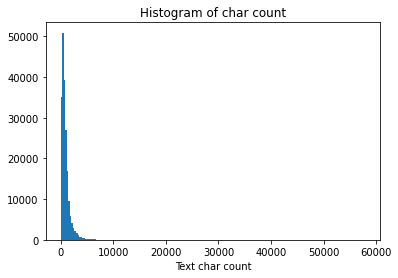

In [27]:
#Viz of sentences' length
_ = plt.hist(df_train['text_len'], bins=200)
plt.xlabel('Text char count')
plt.title("Histogram of char count")

### Viz of news category

Text(0.5, 0, 'category')

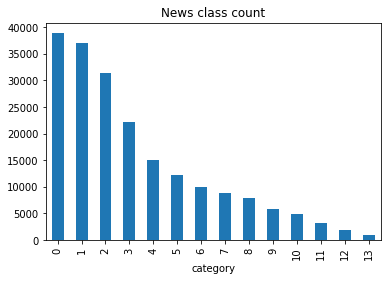

In [28]:
#Viz of news category
df_train['label'].value_counts().plot(kind='bar')
plt.title('News class count')
plt.xlabel("category")

在数据集中标签的对应的关系如下：{'科技': 0, '股票': 1, '体育': 2, '娱乐': 3, '时政': 4, '社会': 5, '教育': 6, '财经': 7, '家居': 8, '游戏': 9, '房产': 10, '时尚': 11, '彩票': 12, '星座': 13}
从统计结果可以看出，赛题的数据集类别分布存在较为不均匀的情况。在训练集中科技类新闻最多，其次是股票类新闻，最少的新闻是星座新闻。

### Word frequencty

In [29]:
from collections import Counter

#### Find the most/least frequent word

In [30]:
all_lines = ' '.join(list(df_train['text']))
type(all_lines)

str

In [31]:
word_count = Counter(all_lines.split(" "))
word_count = sorted(word_count.items(), key=lambda d:int(d[1]), reverse = True)

In [32]:
print(len(word_count))
# in total there are 6869 words in the dataset

6869


In [33]:
print(word_count[0])
print(word_count[1])
print(word_count[2])
print(word_count[3])
print(word_count[4])

('3750', 7482224)
('648', 4924890)
('900', 3262544)
('3370', 2020958)
('6122', 1602363)


In [34]:
print(word_count[-1])

('3133', 1)


#### Find punctuation marks

这里还可以根据字在每个句子的出现情况，反推出标点符号。下面代码统计了不同字符在句子中出现的次数，其中字符3750，字符900和字符648在20w新闻的覆盖率接近99%，很有可能是标点符号。

In [35]:
df_train['text_unique'] = df_train['text'].apply(lambda x: ' ' .join(list(set(x.split(' ')))))
#df_train

In [36]:
all_lines1 = ' '.join(list(df_train['text_unique']))
word_count1 = Counter(all_lines1.split(" "))
word_count1 = sorted(word_count1.items(), key=lambda d:int(d[1]), reverse = True)

In [37]:
print(word_count1[0])
print(word_count1[1])
print(word_count1[2])
print(word_count1[3])
print(word_count1[4])

('3750', 197997)
('900', 197653)
('648', 191975)
('2465', 177310)
('6122', 176543)


数据分析的结论
通过上述分析我们可以得出以下结论：

赛题中每个新闻包含的字符个数平均为1000个，还有一些新闻字符较长；
赛题中新闻类别分布不均匀，科技类新闻样本量接近4w，星座类新闻样本量不到1k；
赛题总共包括7000-8000个字符；

通过数据分析，我们还可以得出以下结论：

每个新闻平均字符个数较多，可能需要截断；

由于类别不均衡，会严重影响模型的精度；

本章小结
本章对赛题数据进行读取，并新闻句子长度、类别和字符进行了可视化分析。


本章作业
假设字符3750，字符900和字符648是句子的标点符号，请分析赛题每篇新闻平均由多少个句子构成？

In [38]:
type(word_count[0][0])
#word_count[0][0]

str

In [39]:
sentence_number = int(word_count[0][0]) + int(word_count[1][0]) + int(word_count[2][0])
sentence_number 

5298

统计每类新闻中出现次数对多的字符

In [43]:
df2 = df_train.groupby(['label'], sort=True)['text_len'].max()
df2

label
0     18587
1     57921
2     41894
3     10817
4     14928
5     15839
6     25728
7     14469
8     15271
9     23866
10    20622
11     5729
12     8737
13     6399
Name: text_len, dtype: int64

# Task3 基于机器学习的文本分类

在上一章节，我们对赛题的数据进行了读取，并在末尾给出了两个小作业。如果你顺利完成了作业，那么你基本上对`Python`也比较熟悉了。在本章我们将使用传统机器学习算法来完成新闻分类的过程，将会结束到赛题的核心知识点。

## 基于机器学习的文本分类

在本章我们将开始使用机器学习模型来解决文本分类。机器学习发展比较广，且包括多个分支，本章侧重使用传统机器学习，从下一章开始是基于深度学习的文本分类。

### 学习目标

- 学会TF-IDF的原理和使用
- 使用sklearn的机器学习模型完成文本分类

### 机器学习模型


机器学习是对能通过经验自动改进的计算机算法的研究。机器学习通过历史数据**训练**出**模型**对应于人类对经验进行**归纳**的过程，机器学习利用**模型**对新数据进行**预测**对应于人类利用总结的**规律**对新问题进行**预测**的过程。

机器学习有很多种分支，对于学习者来说应该优先掌握机器学习算法的分类，然后再其中一种机器学习算法进行学习。由于机器学习算法的分支和细节实在是太多，所以如果你一开始就被细节迷住了眼，你就很难知道全局是什么情况的。

如果你是机器学习初学者，你应该知道如下的事情：

1. 机器学习能解决一定的问题，但不能奢求机器学习是万能的；
2. 机器学习算法有很多种，看具体问题需要什么，再来进行选择；
3. 每种机器学习算法有一定的偏好，需要具体问题具体分析；

![machine_learning_overview](https://img-blog.csdnimg.cn/20200714203223253.jpg)

### 文本表示方法 Part1

在机器学习算法的训练过程中，假设给定$N$个样本，每个样本有$M$个特征，这样组成了$N×M$的样本矩阵，然后完成算法的训练和预测。同样的在计算机视觉中可以将图片的像素看作特征，每张图片看作hight×width×3的特征图，一个三维的矩阵来进入计算机进行计算。

但是在自然语言领域，上述方法却不可行：文本是不定长度的。文本表示成计算机能够运算的数字或向量的方法一般称为词嵌入（Word Embedding）方法。词嵌入将不定长的文本转换到定长的空间内，是文本分类的第一步。

#### One-hot

这里的One-hot与数据挖掘任务中的操作是一致的，即将每一个单词使用一个离散的向量表示。具体将每个字/词编码一个索引，然后根据索引进行赋值。

One-hot表示方法的例子如下：

```python
句子1：我 爱 北 京 天 安 门
句子2：我 喜 欢 上 海
```

首先对所有句子的字进行索引，即将每个字确定一个编号：

```python
{
	'我': 1, '爱': 2, '北': 3, '京': 4, '天': 5,
  '安': 6, '门': 7, '喜': 8, '欢': 9, '上': 10, '海': 11
}
```

在这里共包括11个字，因此每个字可以转换为一个11维度稀疏向量：

```
我：[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]
爱：[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0]
...
海：[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1]
```

#### Bag of Words

Bag of Words（词袋表示），也称为Count Vectors，每个文档的字/词可以使用其出现次数来进行表示。

```python
句子1：我 爱 北 京 天 安 门
句子2：我 喜 欢 上 海
```

直接统计每个字出现的次数，并进行赋值：

句子1：我 爱 北 京 天 安 门
转换为 [1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0]

句子2：我 喜 欢 上 海
转换为 [1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1]

在sklearn中可以直接`CountVectorizer`来实现这一步骤：

In [44]:
from sklearn.feature_extraction.text import CountVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = CountVectorizer() 
vectorizer.fit_transform(corpus).toarray()

# CountVectorizer() : Get the term frequency
# n_gram好像是用来组词的，几个词一组？
#大小写不敏感
#出现的英文词，按alphabet重排序了

array([[0, 1, 1, 1, 0, 0, 1, 0, 1],
       [0, 2, 0, 1, 0, 1, 1, 0, 1],
       [1, 0, 0, 1, 1, 0, 1, 1, 1],
       [0, 1, 1, 1, 0, 0, 1, 0, 1]], dtype=int64)

#### N-gram

N-gram与Count Vectors类似，不过加入了相邻单词组合成为新的单词，并进行计数。

如果N取值为2，则句子1和句子2就变为：

```
句子1：我爱 爱北 北京 京天 天安 安门
句子2：我喜 喜欢 欢上 上海
```

#### TF-IDF

TF-IDF 分数由两部分组成：第一部分是**词语频率**（Term Frequency），第二部分是**逆文档频率**（Inverse Document Frequency）。其中计算语料库中文档总数除以含有该词语的文档数量，然后再取对数就是逆文档频率。

```
TF(t)= 该词语在当前文档出现的次数 / 当前文档中词语的总数
IDF(t)= log_e（文档总数 / 出现该词语的文档总数）
```

### 基于机器学习的文本分类

接下来我们将对比不同文本表示算法的精度，通过本地构建验证集计算F1得分。

#### Count Vectors + RidgeClassifier

In [45]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score 


df_train=pd.read_csv('C:/Chen/1_Coding/20200721_nlp_learning/train_set.csv',sep='\t', nrows=15000)

In [46]:
vectorizer = CountVectorizer(max_features=3000)
train_test = vectorizer.fit_transform(df_train['text'])

clf = RidgeClassifier()
clf.fit(train_test[:10000], df_train['label'].values[:10000])

val_pred = clf.predict(train_test[10000:])
print(f1_score(df_train['label'].values[10000:], val_pred, average='macro'))
#0.654430246247168

KeyboardInterrupt: 

####  TF-IDF +  RidgeClassifier

In [ ]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score

df_train=pd.read_csv('C:/Chen/1_Coding/20200721_nlp_learning/train_set.csv',sep='\t', nrows=15000)

In [ ]:
tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=3000)
train_test = tfidf.fit_transform(df_train['text'])

clf = RidgeClassifier()
clf.fit(train_test[:10000], df_train['label'].values[:10000])

val_pred = clf.predict(train_test[10000:])
print(f1_score(df_train['label'].values[10000:], val_pred, average='macro'))

# CountVectorizer() : Get the term frequency
# TfidfVectorizer() : based on CountVectorizer() 
# 需要先用CountVectorizer()
#0.8719372173702

**以下是一个来自Sklearn官方文档的例子**
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html

另外还有两个相关文档：
https://scikit-learn.org/stable/modules/feature_extraction.html
https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html  

In [ ]:
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.pipeline import Pipeline
import numpy as np

corpus = ['this is the first document',
          'this document is the second document',
          'and this is the third one',
          'is this the first document']
vocabulary = ['this', 'document', 'first', 'is', 'second', 'the', 'and', 'one']
pipe = Pipeline([('count', CountVectorizer(vocabulary=vocabulary)), 
                 # CountVectorizer() : 计算文档中所有包括该词的数目
                 ('tfid', TfidfTransformer())]).fit(corpus)
pipe['count'].transform(corpus).toarray()
"""
array([[1, 1, 1, 1, 0, 1, 0, 0],
       [1, 2, 0, 1, 1, 1, 0, 0],
       [1, 0, 0, 1, 0, 1, 1, 1],
       [1, 1, 1, 1, 0, 1, 0, 0]])
"""

In [ ]:
pipe['tfid'].idf_
"""
array([1.        , 1.22314355, 1.51082562, 1.        , 1.91629073,
       1.        , 1.91629073, 1.91629073])
"""

In [ ]:
pipe.transform(corpus).shape

"""
(4, 8)
"""

以《中国的蜜蜂养殖》为例，假定该文长度为1000个词，"中国"、"蜜蜂"、"养殖"各出现20次，则这三个词的"词频"（TF）都为0.02。然后，搜索Google发现，包含"的"字的网页共有250亿张，假定这就是中文网页总数。包含"中国"的网页共有62.3亿张，包含"蜜蜂"的网页为0.484亿张，包含"养殖"的网页为0.973亿张。则它们的逆文档频率（IDF）和TF-IDF如下：

In [ ]:
import math

def tfidf(wtermfreq, alltermfreq, wdocfreq, alldocfreq):
    tf = round(wtermfreq/alltermfreq,4)
    idf = round(math.log10(wdocfreq/(alldocfreq+1)),4)
    tfidf = round(tf*idf,4) 
    print ("tf="+str(tf)+",","idf="+str(idf)+",","tfidf="+str(tfidf))

#中国
tfidf(20,1000,250*10**8,62.3*10**8)

#蜜蜂
tfidf(20,1000,250*10**8,0.484*10**8)

#养殖
tfidf(20,1000,250*10**8,0.973*10**8)

从上表可见，"蜜蜂"的TF-IDF值最高，"养殖"其次，"中国"最低。（如果还计算"的"字的TF-IDF，那将是一个极其接近0的值。）所以，如果只选择一个词，"蜜蜂"就是这篇文章的关键词。

除了自动提取关键词，TF-IDF算法还可以用于许多别的地方。比如，信息检索时，对于每个文档，都可以分别计算一组搜索词（"中国"、"蜜蜂"、"养殖"）的TF-IDF，将它们相加，就可以得到整个文档的TF-IDF。这个值最高的文档就是与搜索词最相关的文档。
TF-IDF算法的优点是简单快速，结果比较符合实际情况。缺点是，单纯以"词频"衡量一个词的重要性，不够全面，有时重要的词可能出现次数并不多。而且，这种算法无法体现词的位置信息，出现位置靠前的词与出现位置靠后的词，都被视为重要性相同，这是不正确的。（一种解决方法是，对全文的第一段和每一段的第一句话，给予较大的权重。）


### 本章小结

本章我们介绍了基于机器学习的文本分类方法，并完成了两种方法的对比。

### 本章作业

1. 尝试改变TF-IDF的参数，并验证精度
2. 尝试使用其他机器学习模型，完成训练和验证

1. 尝试改变TF-IDF的参数，并验证精度

https://scikit-learn.org/stable/modules/feature_extraction.html
看paramater部分，调参数

1.1. 
TF-IDF + RidgeClassifier 
把总数据量调大

In [ ]:
import pandas as pd

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import f1_score

df_train1=pd.read_csv('C:/Chen/1_Coding/20200721_nlp_learning/train_set.csv',sep='\t')

In [ ]:
tfidf = TfidfVectorizer(ngram_range=(1,3), max_features=3000)
train_test = tfidf.fit_transform(df_train1['text'])

clf = RidgeClassifier()
clf.fit(train_test[:], df_train1['label'].values[:])

val_pred = clf.predict(train_test[:])
print(f1_score(df_train1['label'].values[:], val_pred, average='macro'))


1.2. 
TF-IDF + RidgeClassifier 
在1.1的基础上把max_feature调大

In [ ]:
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=30000)
train_test = tfidf.fit_transform(df_train1['text'])

clf = RidgeClassifier()
clf.fit(train_test[:], df_train1['label'].values[:])

val_pred = clf.predict(train_test[:])
print(f1_score(df_train1['label'].values[:], val_pred, average='macro'))

1.3. 
TF-IDF + RidgeClassifier 
在1.1的基础上把ngram_range和max_feature调大

In [ ]:
tfidf = TfidfVectorizer(ngram_range=(1,4), max_features=4000)
train_test = tfidf.fit_transform(df_train1['text'])

clf = RidgeClassifier()
clf.fit(train_test[:], df_train1['label'].values[:])

val_pred = clf.predict(train_test[:])
print(f1_score(df_train1['label'].values[:], val_pred, average='macro'))

2.尝试使用其他机器学习模型，完成训练和验证

分类器总结
https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html

In [ ]:
#tfidf + LR
from sklearn.linear_model import LogisticRegression

tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=30000)
train_test = tfidf.fit_transform(df_train1['text'])

clf = LogisticRegression()
clf.fit(train_test[:], df_train1['label'].values[:])

val_pred = clf.predict(train_test[:])
print(f1_score(df_train1['label'].values[:], val_pred, average='macro'))

In [ ]:
#tfidf + svm.linearSVR
from sklearn.svm import LinearSVR

tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=30000)
train_test = tfidf.fit_transform(df_train1['text'])

clf = LinearSVR()
clf.fit(train_test[:], df_train1['label'].values[:])

val_pred = clf.predict(train_test[:])
print(f1_score(df_train1['label'].values[:], val_pred, average='macro'))

In [ ]:
#tfidf + svm.SVC
from sklearn.svm import SVC

tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=30000)
train_test = tfidf.fit_transform(df_train1['text'])

clf = SVC()
clf.fit(train_test[:], df_train1['label'].values[:])

val_pred = clf.predict(train_test[:])
print(f1_score(df_train1['label'].values[:], val_pred, average='macro'))

In [ ]:
#tfidf + knn_classifier
from sklearn.neighbors import KNeighborsClassifier
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=30000)
train_test = tfidf.fit_transform(df_train1['text'])

clf = KNeighborsClassifier()
clf.fit(train_test[:], df_train1['label'].values[:])

val_pred = clf.predict(train_test[:])
print(f1_score(df_train1['label'].values[:], val_pred, average='macro'))

In [ ]:
#tfidf + DT_classifier
from sklearn.tree import DecisionTreeClassifier
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=30000)
train_test = tfidf.fit_transform(df_train1['text'])

clf = DecisionTreeClassifier()
clf.fit(train_test[:], df_train1['label'].values[:])

val_pred = clf.predict(train_test[:])
print(f1_score(df_train1['label'].values[:], val_pred, average='macro'))

In [ ]:
#tfidf + GBDT_classifier
from sklearn.ensemble import GradientBoostingRegressor
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=30000)
train_test = tfidf.fit_transform(df_train1['text'])

clf = GradientBoostingRegressor()
clf.fit(train_test[:], df_train1['label'].values[:])

val_pred = clf.predict(train_test[:])
print(f1_score(df_train1['label'].values[:], val_pred, average='macro'))

In [ ]:
#tfidf + RF_classifier
from sklearn.ensemble import RandomForestRegressor
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=30000)
train_test = tfidf.fit_transform(df_train1['text'])

clf = RandomForestRegressor()
clf.fit(train_test[:], df_train1['label'].values[:])

val_pred = clf.predict(train_test[:])
print(f1_score(df_train1['label'].values[:], val_pred, average='macro'))

In [ ]:
#tfidf + Xgboost_classifier
from sklearn.tree import RandomForestRegressor
tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=30000)
train_test = tfidf.fit_transform(df_train1['text'])

clf = RandomForestRegressor()
clf.fit(train_test[:], df_train1['label'].values[:])

val_pred = clf.predict(train_test[:])
print(f1_score(df_train1['label'].values[:], val_pred, average='macro'))

In [ ]:
#tfidf + MLPClassifier
from sklearn.neural_network import MLPClassifier

tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=30000)
train_test = tfidf.fit_transform(df_train1['text'])

clf = MLPClassifier()
clf.fit(train_test[:], df_train1['label'].values[:])

val_pred = clf.predict(train_test[:])
print(f1_score(df_train1['label'].values[:], val_pred, average='macro'))

Gridsearch for SVM

In [ ]:
#tfidf + svm.linearSVR(gridsearch)
from sklearn.svm import LinearSVR
from sklearn.model_selection import GridSearchCV

tfidf = TfidfVectorizer(ngram_range=(1,2), max_features=20000)
train_test = tfidf.fit_transform(df_train1['text'])

parameters = {"gamma":[0.001,0.01,0.1,1,10,100], "C":[0.001,0.01,0.1,1,10,100]}
clf = LinearSVR(gamma, C, cv=5)
clf.fit(train_test[:], df_train1['label'].values[:])
clf.best_params_


In [ ]:
#model = LinearSVR(gamma=x, C=y)

In [ ]:
#val_pred = clf.predict(train_test[:])
#print(f1_score(df_train1['label'].values[:], val_pred, average='macro'))

# Task4 基于深度学习的文本分类1

在上一章节，我们使用传统机器学习算法来解决了文本分类问题，从本章开始我们将尝试使用深度学习方法。

## 基于深度学习的文本分类

与传统机器学习不同，深度学习既提供特征提取功能，也可以完成分类的功能。从本章开始我们将学习如何使用深度学习来完成文本表示。

### 学习目标

- 学习FastText的使用和基础原理
- 学会使用验证集进行调参

### 文本表示方法 Part2

#### 现有文本表示方法的缺陷

在上一章节，我们介绍几种文本表示方法：

- One-hot
- Bag of Words
- N-gram
- TF-IDF

也通过sklean进行了相应的实践，相信你也有了初步的认知。但上述方法都或多或少存在一定的问题：转换得到的向量维度很高，需要较长的训练实践；没有考虑单词与单词之间的关系，只是进行了统计。

与这些表示方法不同，深度学习也可以用于文本表示，还可以将其映射到一个低纬空间。其中比较典型的例子有：FastText、Word2Vec和Bert。在本章我们将介绍FastText，将在后面的内容介绍Word2Vec和Bert。

#### FastText

FastText是一种典型的深度学习词向量的表示方法，它非常简单通过Embedding层将单词映射到稠密空间，然后将句子中所有的单词在Embedding空间中进行平均，进而完成分类操作。

所以FastText是一个三层的神经网络，输入层、隐含层和输出层。

![fast_text](https://img-blog.csdnimg.cn/20200714204856589.png)

下图是使用keras实现的FastText网络结构：

![keras_fasttext](https://img-blog.csdnimg.cn/20200714204249463.jpg)

FastText在文本分类任务上，是优于TF-IDF的：

- FastText用单词的Embedding叠加获得的文档向量，将相似的句子分为一类
- FastText学习到的Embedding空间维度比较低，可以快速进行训练

如果想深度学习，可以参考论文：

Bag of Tricks for Efficient Text Classification, https://arxiv.org/abs/1607.01759

### 基于FastText的文本分类

FastText可以快速的在CPU上进行训练，最好的实践方法就是官方开源的版本：
https://github.com/facebookresearch/fastText/tree/master/python

- pip安装

```
pip install fasttext
```

```
conda install -c mbednarski fasttext
```

- 源码安装

```
git clone https://github.com/facebookresearch/fastText.git
cd fastText
sudo pip install .
```

两种安装方法都可以安装，如果你是初学者可以优先考虑使用pip安装。

- 分类模型

In [47]:
import pandas as pd
from sklearn.metrics import f1_score

# 转换为FastText需要的格式
df_train = pd.read_csv('C:/Chen/1_Coding/20200721_nlp_learning/train_set.csv', sep='\t', nrows=15000)
df_train['label_ft'] = '__label__' + df_train['label'].astype(str)
df_train[['text','label_ft']].iloc[:-5000].to_csv('train.csv', index=None, header=None, sep='\t')

In [48]:
import fasttext

In [51]:
model = fasttext.train_supervised('train.csv', lr=1.0, wordNgrams=2, 
                                  verbose=2, minCount=1, epoch=25, loss="hs")

val_pred = [model.predict(x)[0][0].split('__')[-1] for x in df_train.iloc[-5000:]['text']]
print(f1_score(df_train['label'].values[-5000:].astype(str), val_pred, average='macro'))
# 0.8238894886303253

0.8238894886303253


此时数据量比较小得分为0.82，当不断增加训练集数量时，FastText的精度也会不断增加5w条训练样本时，验证集得分可以到0.89-0.90左右。

### 如何使用验证集调参

在使用TF-IDF和FastText中，有一些模型的参数需要选择，这些参数会在一定程度上影响模型的精度，那么如何选择这些参数呢？

- 通过阅读文档，要弄清楚这些参数的大致含义，那些参数会增加模型的复杂度
- 通过在验证集上进行验证模型精度，找到模型在是否过拟合还是欠拟合

![train_val](https://img-blog.csdnimg.cn/20200714204403844.png)

这里我们使用10折交叉验证，每折使用9/10的数据进行训练，剩余1/10作为验证集检验模型的效果。这里需要注意每折的划分必须保证标签的分布与整个数据集的分布一致。

```python
label2id = {}
for i in range(total):
    label = str(all_labels[i])
    if label not in label2id:
        label2id[label] = [i]
    else:
        label2id[label].append(i)
```

通过10折划分，我们一共得到了10份分布一致的数据，索引分别为0到9，每次通过将一份数据作为验证集，剩余数据作为训练集，获得了所有数据的10种分割。不失一般性，我们选择最后一份完成剩余的实验，即索引为9的一份做为验证集，索引为1-8的作为训练集，然后基于验证集的结果调整超参数，使得模型性能更优。

### 本章小结

本章介绍了FastText的原理和基础使用，并进行相应的实践。然后介绍了通过10折交叉验证划分数据集。

### 本章作业

- 阅读FastText的文档，尝试修改参数，得到更好的分数
- 基于验证集的结果调整超参数，使得模型性能更优

文档在这
https://pypi.org/project/fasttext/